In [1]:
# Importe der Module
from sklearn import svm
import pandas as pd
import numpy as np
import sklearn.preprocessing as prepro

In [2]:
# Einlesen der Trainingsdaten
data = pd.read_csv("trainingdataset.csv")
data.head()

,12430012063.C1_Axis.Actual_Power,12430012063.Energy_Savings.Active_Power_Spindle1,12430012063.Energy_Savings.Active_Power_Z1,12430012063.Main_Spindle.Actual_Position_MCS,12430012063.Main_Spindle.Actual_Power,12430012063.Main_Spindle.Actual_Speed_Rate,12430012063.Main_Spindle.MPC_Peak,12430012063.Main_Spindle.MPC_Veff_Total,12430012063.Main_Spindle.Temperature_Spindle,12430012063.Maintenance_Package.Tool_Usage_Main_lubriTOOL,...,12430012063.Tool_Control_Center.Axial_Force_Compression,12430012063.X1_Axis.Actual_Feed_Rate,12430012063.X1_Axis.Actual_Position_MCS,12430012063.A1_Axis.Actual_Power,12430012063.Energy_Savings.Active_Power_Y1,12430012063.Y1_Axis.Actual_Feed_Rate,12430012063.Y1_Axis.Actual_Position_MCS,12430012063.Maintenance_Package.Tool_Changer_Main_lubriTOOL,12430012063.Maintenance_Package.Tool_Changer_Main,Label
0,1.500000,3.126359,53.527900,179.816218,0.500000,317.379310,1.000000,0.5,28.105000,74.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,i.O.
1,1.571429,1.763218,-223.576625,184.350446,0.507463,317.500000,0.666667,0.5,NaN,NaN,...,0.052632,1011.666667,367.525,NaN,NaN,NaN,NaN,NaN,NaN,i.O.
2,1.000000,1.398177,382.341625,181.430268,0.500000,317.300000,2.333333,0.5,28.067143,74.38,...,0.048148,3049.500000,384.030,NaN,NaN,NaN,NaN,NaN,NaN,i.O.
3,1.500000,1.065278,700.204571,177.692973,0.492308,317.128205,1.666667,1.0,28.032857,NaN,...,0.054286,0.000000,397.960,NaN,NaN,NaN,NaN,NaN,NaN,i.O.
4,1.545455,0.225588,-132.687143,175.616696,0.508475,317.062500,1.500000,1.0,28.000000,74.37,...,0.052000,4358.500000,410.085,NaN,NaN,NaN,NaN,NaN,NaN,i.O.


In [3]:
# Trennung der Daten in Trainingsdaten und Label (1/2)
X = data[[
       '12430012063.C1_Axis.Actual_Power',
       '12430012063.Energy_Savings.Active_Power_Spindle1',
       '12430012063.Energy_Savings.Active_Power_Z1',
       '12430012063.Main_Spindle.Actual_Position_MCS',
       '12430012063.Main_Spindle.Actual_Power',
       '12430012063.Main_Spindle.Actual_Speed_Rate',
       '12430012063.Main_Spindle.MPC_Peak',
       '12430012063.Main_Spindle.MPC_Veff_Total',
       '12430012063.Main_Spindle.Temperature_Spindle',
       '12430012063.Maintenance_Package.Tool_Usage_Main_lubriTOOL',
       '12430012063.Tool_Control_Center.Axial_Force_Tension',
       '12430012063.Tool_Control_Center.Bending_Moment',
       '12430012063.Tool_Control_Center.Symmetry',
       '12430012063.X1_Axis.Actual_Power', '12430012063.Y1_Axis.Actual_Power',
       '12430012063.Y1_Axis.Temperature_Y_Slide',
       '12430012063.Z1_Axis.Actual_Feed_Rate',
       '12430012063.Z1_Axis.Actual_Position_MCS',
       '12430012063.Z1_Axis.Actual_Power',
       '12430012063.Energy_Savings.Active_Power_X1',
       '12430012063.Tool_Control_Center.Axial_Force_Compression',
       '12430012063.X1_Axis.Actual_Feed_Rate',
       '12430012063.X1_Axis.Actual_Position_MCS',
       '12430012063.A1_Axis.Actual_Power',
       '12430012063.Energy_Savings.Active_Power_Y1',
       '12430012063.Y1_Axis.Actual_Feed_Rate',
       '12430012063.Y1_Axis.Actual_Position_MCS',
       '12430012063.Maintenance_Package.Tool_Changer_Main_lubriTOOL',
       '12430012063.Maintenance_Package.Tool_Changer_Main'
]]

,12430012063.C1_Axis.Actual_Power,12430012063.Energy_Savings.Active_Power_Spindle1,12430012063.Energy_Savings.Active_Power_Z1,12430012063.Main_Spindle.Actual_Position_MCS,12430012063.Main_Spindle.Actual_Power,12430012063.Main_Spindle.Actual_Speed_Rate,12430012063.Main_Spindle.MPC_Peak,12430012063.Main_Spindle.MPC_Veff_Total,12430012063.Main_Spindle.Temperature_Spindle,12430012063.Maintenance_Package.Tool_Usage_Main_lubriTOOL,...,12430012063.Energy_Savings.Active_Power_X1,12430012063.Tool_Control_Center.Axial_Force_Compression,12430012063.X1_Axis.Actual_Feed_Rate,12430012063.X1_Axis.Actual_Position_MCS,12430012063.A1_Axis.Actual_Power,12430012063.Energy_Savings.Active_Power_Y1,12430012063.Y1_Axis.Actual_Feed_Rate,12430012063.Y1_Axis.Actual_Position_MCS,12430012063.Maintenance_Package.Tool_Changer_Main_lubriTOOL,12430012063.Maintenance_Package.Tool_Changer_Main
0,1.500000,3.126359,53.527900,179.816218,0.500000,317.379310,1.000000,0.500000,28.105000,74.39,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,1.571429,1.763218,-223.576625,184.350446,0.507463,317.500000,0.666667,0.500000,NaN,NaN,...,416.8530,0.052632,1011.666667,367.5250,NaN,NaN,NaN,NaN,NaN,NaN
2,1.000000,1.398177,382.341625,181.430268,0.500000,317.300000,2.333333,0.500000,28.067143,74.38,...,-60.9040,0.048148,3049.500000,384.0300,NaN,NaN,NaN,NaN,NaN,NaN
3,1.500000,1.065278,700.204571,177.692973,0.492308,317.128205,1.666667,1.000000,28.032857,NaN,...,-111.6570,0.054286,0.000000,397.9600,NaN,NaN,NaN,NaN,NaN,NaN
4,1.545455,0.225588,-132.687143,175.616696,0.508475,317.062500,1.500000,1.000000,28.000000,74.37,...,4.0605,0.052000,4358.500000,410.0850,NaN,NaN,NaN,NaN,NaN,NaN
5,1.400000,0.213056,127.758000,183.630089,0.493151,317.393939,1.666667,1.000000,27.970000,74.36,...,36.5425,0.050000,1133.000000,428.0700,5.500000,NaN,NaN,NaN,NaN,NaN
6,1.538462,0.201842,930.675571,178.612072,0.500000,317.250000,1.500000,0.666667,27.936000,NaN,...,-203.0130,0.064286,0.000000,442.9600,5.533333,NaN,NaN,NaN,NaN,NaN
7,1.444444,0.210714,322.866222,179.166518,0.500000,317.139535,2.000000,0.428571,27.902000,74.35,...,NaN,0.059091,4252.000000,453.0250,5.454545,NaN,NaN,NaN,NaN,NaN
8,1.666667,0.798958,-269.504125,182.774375,0.500000,317.111111,1.333333,0.500000,27.864615,NaN,...,415.4995,0.045455,2775.000000,471.8750,5.500000,32.8810,NaN,NaN,NaN,NaN
9,1.428571,0.824731,85.094500,187.007257,0.507463,317.105263,1.500000,1.000000,27.842000,74.34,...,1607.4100,0.080000,-8254.000000,369.9875,5.333333,-3.0825,1496.0,-400.655,NaN,NaN


In [4]:
# Trennung der Daten in Trainingsdaten und Label (2/2)
Y = data[["Label"]]

,Label
0,i.O.
1,i.O.
2,i.O.
3,i.O.
4,i.O.


In [5]:
# Lösche alle Trainingsdaten mit NANs, NANs kann das SVM-Modul vom sklearn nicht händeln
X = X.dropna(axis=1)
Y = Y.dropna(axis=1)

In [6]:
# Vergebe für die alle 'i.O.'-Werte den Wert 1 und alle anderen den Wert 0
for ind in Y.index:
    if Y['Label'][ind] == 'i.O.':
        Y['Label'][ind] = 1
    else:
        Y['Label'][ind] = 0   

In [7]:
# Wähle ein Modell, in diesem Fall Support Vector Machines mit linearer Regression und trainiere das Modell
clf = svm.SVR()
clf.fit(X,Y)

# Versuche eine Vorhersage mit dem trainierten Modell
Y_pred = clf.predict(X)

/usr/lib/python3.8/site-packages/sklearn/utils/validation.py:744: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


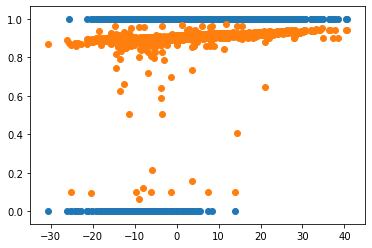

In [8]:
# Plotte Trainingsdaten + Vorhersagedaten in einer Grafik
import matplotlib.pyplot as plt

plt.scatter(X.iloc[:,0], Y)
plt.scatter(X.iloc[:,0], Y_pred)
plt.show()